In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from copy import deepcopy
os.chdir('C:/workspace/Github/big_contest/data')
#pd.options.display.max_rows = None
dat = pd.read_csv('dat.csv', engine = 'python')

#dat.head()

# null개수 파악

In [127]:
for i in range(len(dat.columns)):
    print(dat.columns[i] + '의 null개수 : ', np.sum(pd.isnull(dat[dat.columns[i]])), '\n')

순번의 null개수 :  0 

영화명의 null개수 :  0 

감독의 null개수 :  150 

제작사의 null개수 :  8054 

수입사의 null개수 :  3436 

배급사의 null개수 :  550 

개봉일의 null개수 :  0 

영화유형의 null개수 :  0 

영화형태의 null개수 :  1 

국적의 null개수 :  1 

전국스크린수의 null개수 :  0 

전국매출액의 null개수 :  122 

전국관객수의 null개수 :  0 

서울매출액의 null개수 :  128 

서울관객수의 null개수 :  0 

장르의 null개수 :  54 

등급의 null개수 :  16 

영화구분의 null개수 :  0 



# 스크린수, 관객수, 매출액에 대한 상관성과 이상값 체크

In [121]:
dat_num = deepcopy(dat.loc[:,'전국스크린수':'서울관객수'])
dat_num = dat_num.dropna()

In [122]:
dat_num['전국스크린수'] = dat_num['전국스크린수'].str.replace(',', '')
dat_num['전국스크린수'] = dat_num['전국스크린수'].astype(float)
dat_num['전국매출액'] = dat_num['전국매출액'].astype(float)
dat_num['전국관객수'] = dat_num['전국관객수'].str.replace(',', '')
dat_num['전국관객수'] = dat_num['전국관객수'].astype(float)
dat_num['서울매출액'] = dat_num['서울매출액'].astype(float)
dat_num['서울관객수'] = dat_num['서울관객수'].str.replace(',', '')
dat_num['서울관객수'] = dat_num['서울관객수'].astype(float)

In [143]:
dat_num = dat_num[dat_num['전국관객수']>10000]

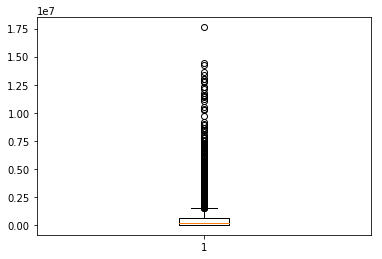

In [124]:
a=plt.boxplot(dat_num['전국관객수'])

In [119]:
dat_num.corr(method = 'pearson')

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수
전국스크린수,1.000000,0.751031,0.733176,0.731023,0.712624
전국매출액,0.751031,1.000000,0.995486,0.985791,0.981241
전국관객수,0.733176,0.995486,1.000000,0.980638,0.986232
서울매출액,0.731023,0.985791,0.980638,1.000000,0.994034
서울관객수,0.712624,0.981241,0.986232,0.994034,1.000000


# 컬럼 정리(한국영화만)

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from copy import deepcopy
os.chdir('C:/workspace/Github/big_contest/data')
#pd.options.display.max_rows = None
dat = pd.read_csv('dat.csv', engine = 'python')

# len(dat) = 12285
# dat.head() 

In [476]:
dat = dat.drop(['순번','전국매출액', '서울매출액', '서울관객수', '영화유형', '수입사'], axis = 1)

In [477]:
dat = dat[dat['국적'] == '한국']
dat = dat[dat['전국스크린수'] != '0']
dat = dat.drop('국적', axis=1)
dat = dat.dropna()

# len(dat) = 2471
# dat.head()

In [478]:
dat['전국스크린수'] = dat['전국스크린수'].str.replace(',', '')
dat['전국스크린수'] = dat['전국스크린수'].astype(float)
dat['전국관객수'] = dat['전국관객수'].str.replace(',', '')
dat['전국관객수'] = dat['전국관객수'].astype(float)
#dat.dtypes

In [479]:
dat = dat.drop('영화형태', axis =1)

In [480]:
dat['등급'][dat[dat['등급'] == '18세관람가'].index] = '청소년관람불가' # 18세 관람가가 1명이기 때문에 제거하는 대신 청소년관람불가로 변경
dat = dat[dat['전국스크린수']>100] # 스크린수 너무 맞은 데이터 제거

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [481]:
dat['등급'].value_counts()

15세이상관람가    326
청소년관람불가     153
12세이상관람가    142
전체관람가        74
Name: 등급, dtype: int64

In [330]:
dat.head()

,영화명,감독,제작사,배급사,개봉일,전국스크린수,전국관객수,장르,등급,영화구분
0,명량,김한민,(주)빅스톤픽쳐스,씨제이이앤엠(주),2014-07-30,1587.0,17613682.0,사극,15세이상관람가,상업영화
1,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,1912.0,14410931.0,판타지,12세이상관람가,상업영화
2,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",씨제이이앤엠(주),2014-12-17,966.0,14245998.0,드라마,12세이상관람가,상업영화
4,베테랑,류승완,"(주)외유내강,(주)필름케이",씨제이이앤엠(주),2015-08-05,1064.0,13395400.0,액션,15세이상관람가,상업영화
6,도둑들,최동훈,(주)케이퍼필름,(주)쇼박스,2012-07-25,1072.0,12983330.0,액션,15세이상관람가,상업영화


In [482]:
a = list()
for i in dat.index:
    a.append(dat['개봉일'][i][5:7])
    
    
for i, j in enumerate(a):
    a[i] = int(j)


for i, j in enumerate(a):
    if 0 < j < 4:
        a[i] = 1
    elif 3 < j < 7:
        a[i] = 2
    elif 6 < j < 10:
        a[i] = 3
    else:
        a[i] = 4

In [483]:
dat['개봉한분기'] = a
dat = dat.drop('개봉일', axis = 1)

In [372]:
dat.head()

,영화명,감독,제작사,배급사,전국스크린수,전국관객수,장르,등급,영화구분,개봉한분기
0,명량,김한민,(주)빅스톤픽쳐스,씨제이이앤엠(주),1587.0,17613682.0,사극,15세이상관람가,상업영화,3
1,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,1912.0,14410931.0,판타지,12세이상관람가,상업영화,4
2,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",씨제이이앤엠(주),966.0,14245998.0,드라마,12세이상관람가,상업영화,4
4,베테랑,류승완,"(주)외유내강,(주)필름케이",씨제이이앤엠(주),1064.0,13395400.0,액션,15세이상관람가,상업영화,3
6,도둑들,최동훈,(주)케이퍼필름,(주)쇼박스,1072.0,12983330.0,액션,15세이상관람가,상업영화,3


# 장르, 등급, 영화구분, 개봉한분기 더미변수화 한 후 전국관객수 예측

In [379]:
dat[pd.get_dummies(dat['장르']).columns] = pd.get_dummies(dat['장르'])
dat[pd.get_dummies(dat['영화구분']).columns] = pd.get_dummies(dat['영화구분'])
dat[pd.get_dummies(dat['등급']).columns] = pd.get_dummies(dat['등급'])
dat[pd.get_dummies(dat['개봉한분기']).columns] = pd.get_dummies(dat['개봉한분기'])

In [381]:
dat = dat.drop(['영화명','감독','제작사','배급사'], axis = 1)
dat = dat.drop(['장르', '등급', '영화구분', '개봉한분기'], axis = 1)

In [459]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat.drop(['전국관객수'], axis = 1), dat['전국관객수'], test_size=0.33, random_state=3)

In [460]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model = model.fit(X_train, y_train)

In [461]:
y_new = model.predict(X_test)

In [473]:
import math
math.sqrt(np.mean((y_test-y_new)**2))

1394755.0189338052

In [488]:
X_test

,전국스크린수,SF,가족,공포(호러),다큐멘터리,드라마,멜로/로맨스,미스터리,범죄,사극,...,다양성영화,상업영화,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가,1,2,3,4
1851,204.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
208,806.0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1111,372.0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3410,101.0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1828,300.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
967,356.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1225,559.0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2552,133.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2425,163.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
267,1064.0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


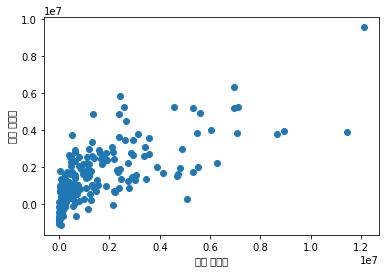

In [463]:
plt.scatter(y_test, y_new)
plt.xlabel('실제 관객수')
plt.ylabel('예측 관객수')
plt.show()

In [465]:
X_test

,전국스크린수,SF,가족,공포(호러),다큐멘터리,드라마,멜로/로맨스,미스터리,범죄,사극,...,다양성영화,상업영화,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가,1,2,3,4
1851,204.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
208,806.0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1111,372.0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3410,101.0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1828,300.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
967,356.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1225,559.0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2552,133.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2425,163.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
267,1064.0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)


In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores